# Індивідуальне залікове завдання 

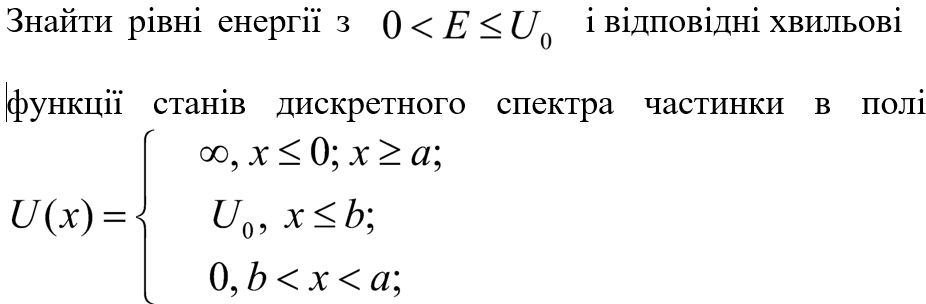

# Прямоугольная потенциальная яма между бесконечными стенками

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))
    
def displ(tex):
    display(Math(tex))

In [2]:
var("x, m, E, h, U_0, a, b, A, B, C, D, _K1, _K2, _C0, _C1, k, kappa, k_0")
u=function('u')(x)

Уравнение Шредингера на интервале от $0$ до $b$

$\frac {\partial^2 u}{\partial x^2} + \frac{2 m}{\hbar^2} \left(E - U(x)\right)u = 0$

$\frac{2 m}{\hbar^2} \left(E - U_0\right) = \varkappa^2$

$\frac{2 m E}{\hbar^2} = k^2$

$\frac{2 m U_0}{\hbar^2} = k^2 - \varkappa^2$

$\varkappa^2 = k^2 - \frac{2 m U_0}{\hbar^2}$

In [3]:
eq_1 = diff(u,x,2) + 2*m/h^2 * (E - U_0) * u == 0
disp(eq_1)

<IPython.core.display.Math object>

In [4]:
eq_1 = diff(u,x,2) + kappa^2 * u == 0
disp(eq_1)

<IPython.core.display.Math object>

Решение уравнения Шредингера на интервале от $0$ до $b$

In [5]:
forget()
#assume(E < U_0)
assume(E > U_0)
assume(m > 0)
assume(kappa>0)
assume((k_0-k)*(k_0+k)<0)
sol_1 = desolve(eq_1, u, ivar=x, contrib_ode = True, algorithm="fricas") \
    .subs(_C0 == A, _C1 == B)
disp(sol_1)

<IPython.core.display.Math object>

Подставляем в это решение граничные условия на непроницаемой стенке при $x = 0$

In [6]:
boundary_eq_x0 = sol_1.subs(x == 0) == 0
disp(boundary_eq_x0)

<IPython.core.display.Math object>

Уравнение Шредингера на интервале от $b$ до $a$

In [7]:
eq_2 = diff(u,x,2) + 2*m/h^2 * (E) * u == 0
disp(eq_2)

<IPython.core.display.Math object>

In [8]:
eq_2 = diff(u,x,2) + k^2 * u == 0
disp(eq_2)

<IPython.core.display.Math object>

In [9]:
forget()
#assume(E<0)
assume(E>0)
assume(m > 0)
assume(k>0)
sol_2 = desolve(eq_2, u, ivar=x, contrib_ode = True) \
    .subs(_K1 == C, _K2 == D)

disp(sol_2)

<IPython.core.display.Math object>

Подставляем в это решение граничные условия на непроницаемой стенке при $x = a$

In [10]:
boundary_eq_xa = sol_2.subs(x == a) == 0
disp(boundary_eq_xa)

<IPython.core.display.Math object>

сшиваем оба решения в точке $b$

In [11]:
link_u_xb = sol_1.subs(x == b) == sol_2.subs(x == b)
disp(link_u_xb)

<IPython.core.display.Math object>

In [12]:
link_dudx_xb = sol_1.diff(x).subs(x == b) == sol_2.diff(x).subs(x == b)
disp(link_dudx_xb)

<IPython.core.display.Math object>

In [13]:
sol_A = boundary_eq_x0.solve(A)
disp(sol_A)

<IPython.core.display.Math object>

In [14]:
sol_D = boundary_eq_xa.solve(D)
disp(sol_D)

<IPython.core.display.Math object>

In [15]:
sys = [link_u_xb.subs(sol_A).subs(sol_D),
       link_dudx_xb.subs(sol_A).subs(sol_D)]

In [16]:
disp(sys)

<IPython.core.display.Math object>

Данная система имеет нетривиальные решения, если ее определитель равен нулю

In [19]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [20]:
vars = [B, C]

In [21]:
M = GenerateMatrix(sys, vars)

In [22]:
disp(M)

<IPython.core.display.Math object>

In [23]:
det_M = M.determinant()
disp(det_M)

<IPython.core.display.Math object>

In [24]:
disp(det_M.operands())

<IPython.core.display.Math object>

In [25]:
eq_M = det_M.operands()[0] == -det_M.operands()[1]
disp(eq_M)

<IPython.core.display.Math object>

In [26]:
disp(eq_M.lhs().operands())

<IPython.core.display.Math object>

In [27]:
disp(eq_M.rhs().operands())

<IPython.core.display.Math object>

In [28]:
eq_MM = eq_M \
      / eq_M.lhs().operands()[0] \
      / eq_M.rhs().operands()[0] \
      / eq_M.lhs().operands()[2]
disp(eq_MM)

<IPython.core.display.Math object>

$\varkappa^2 = k^2 - \frac{2 m U_0}{\hbar^2}$

In [29]:
eq_MMM = eq_MM.subs(kappa == sqrt(k^2 - k_0^2))
disp(eq_MMM)

<IPython.core.display.Math object>

инициализируем числовыми значениями

In [35]:
values=[a == 3,
        b == 2,
        k_0 == 0.5]

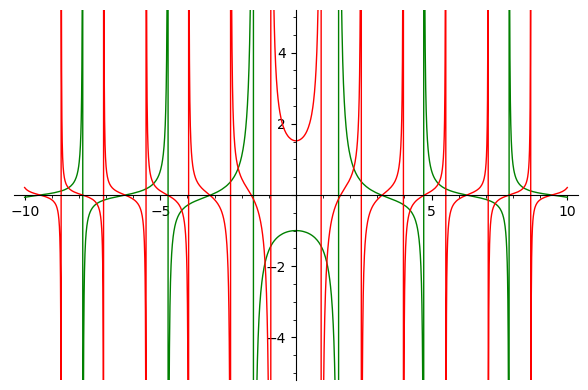

In [36]:
K=10
(plot(eq_MMM.lhs().subs(values), k,-K,+K, color = "green")+
plot(eq_MMM.rhs().subs(values), k,-K,+K, color = "red",
     ymin = -5, ymax = +5)).show()

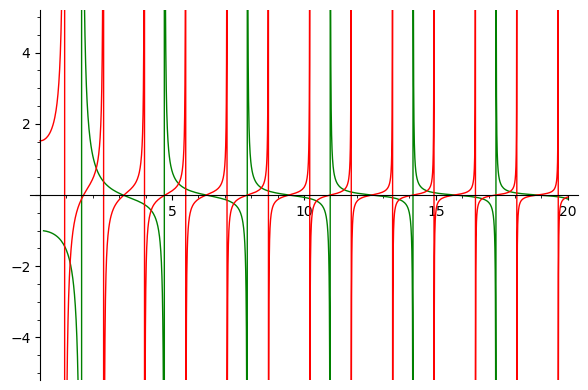

In [37]:
K=20
(plot(eq_MMM.lhs().subs(values), k,0,+K, color = "green")+
plot(eq_MMM.rhs().subs(values), k,0,+K, color = "red",
     ymin = -5, ymax = +5)).show()

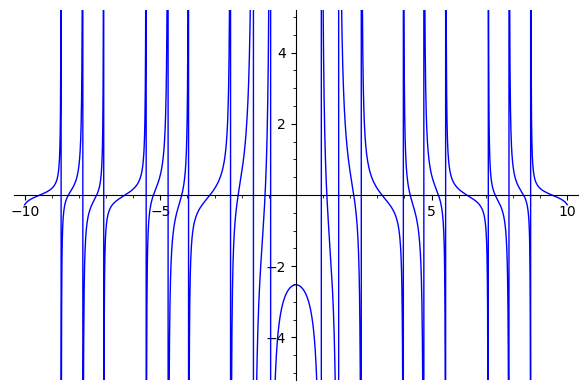

In [38]:
K=10
(plot(eq_MMM.lhs().subs(values)-eq_MMM.rhs().subs(values), k,-K,+K,
     ymin = -5, ymax = +5)).show()

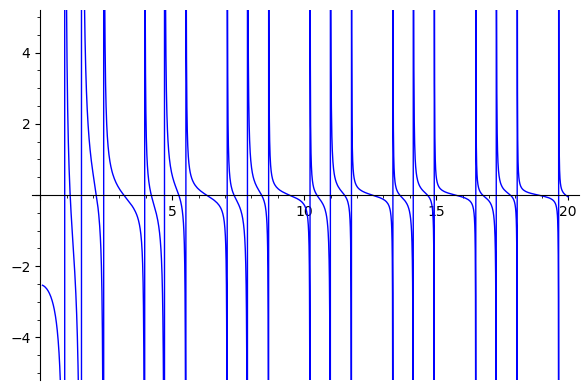

In [39]:
K=20
(plot(eq_MMM.lhs().subs(values)-eq_MMM.rhs().subs(values), k,0,+K,
     ymin = -5, ymax = +5)).show()

$\frac{2 m E}{\hbar^2} = k^2$

$E = \frac{\hbar^2 k^2}{2 m}$